In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Data


https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [3]:
df = pd.read_csv("C:\\Users\\KARAN S07\\Desktop\\Final Year\\Deep Learning\\TF-Course-Notebooks\\TF_Course_Notebooks\\DATA\\kc_house_data.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# historical pricing data for the houses

#df.isnull() returns whether a null data is present and summing up all of it will provide the total number
#missing data in each column.
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#describing the data

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


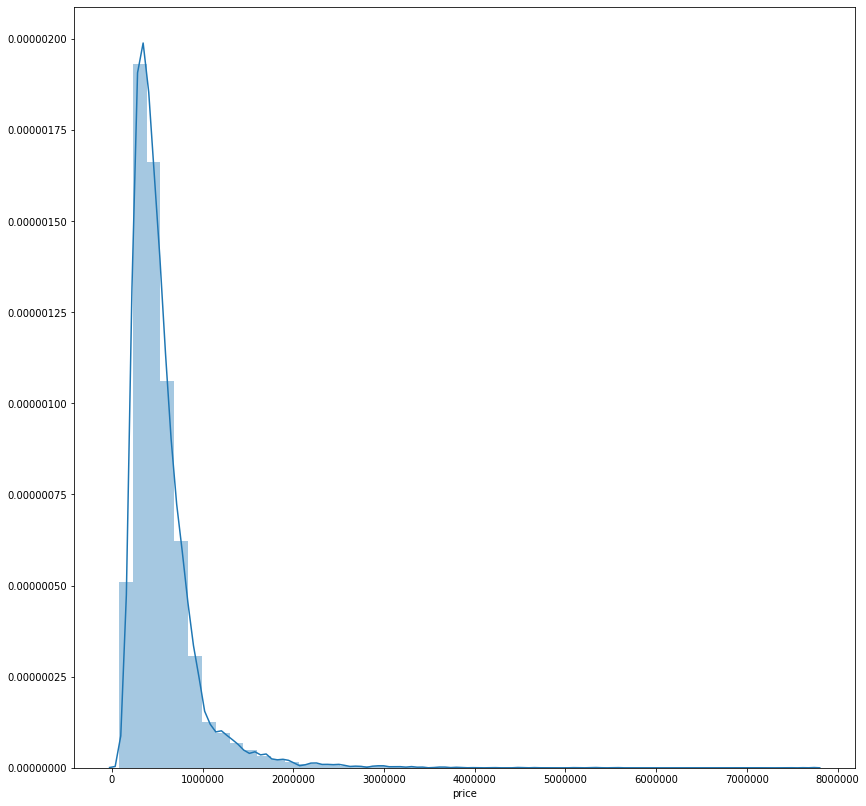

In [7]:
# visualizing the data
plt.figure(figsize=(14,14))
sns.distplot(df['price'])

# describing continuous values using distribution plot.
# from the plot it can be understood that the majority of houses are in the price range of 0 - 2000000

In [8]:
#categorical values such as number of bedrooms is described using count plots

#from the plot it can be understood that the data contains bedrooms 3 and 4 are in higher number.

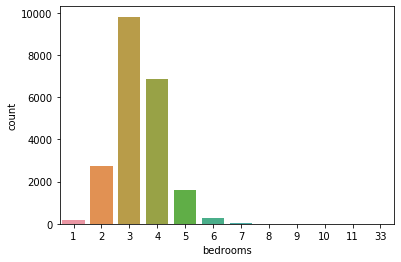

In [9]:
sns.countplot(df["bedrooms"])

In [10]:
# to check the correlation between various columns we can use df.corr()

In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

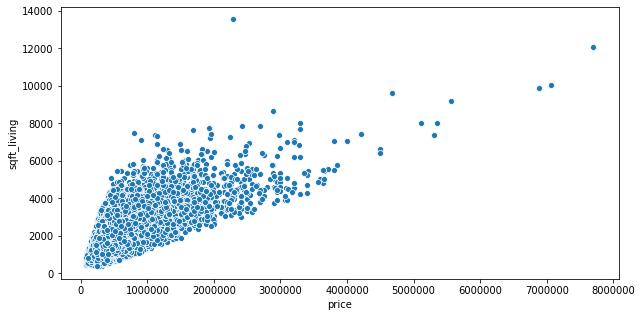

In [12]:
# to check the correlation between two columns we can make use of scatter plot. 
#for instance sqft_livig and price has high corelation.
plt.figure(figsize=(10,5))
sns.scatterplot(x="price",y="sqft_living",data=df)

In [13]:
# using boxplots to analyze the corelation between bedrooms and prices

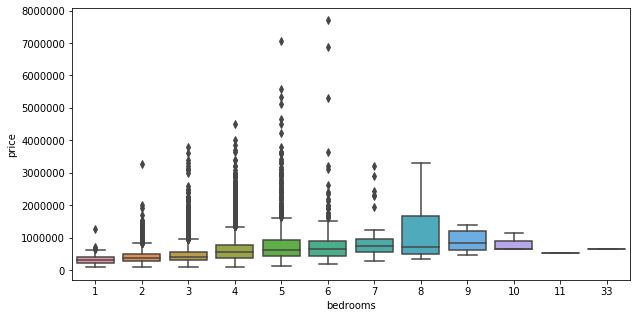

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x="bedrooms",y="price",data=df)

In [15]:
# analysing the longitude and lattitude effects on price 

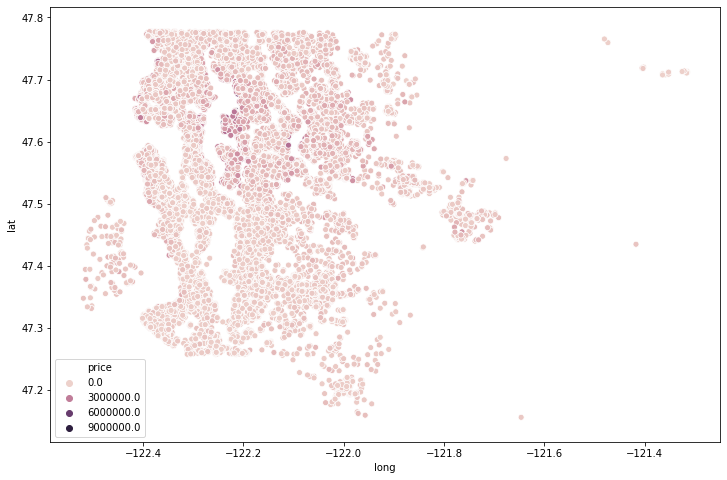

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="long",y="lat",data =df,hue="price")

In [17]:
# considering only bottom 99 % of houses 

In [18]:
non_top_one_percent = df.sort_values('price',ascending=False).iloc[216:]

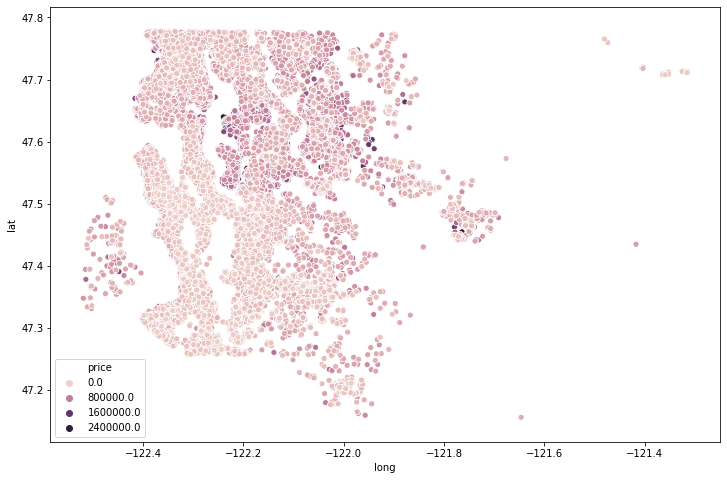

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="long",y="lat",data =non_top_one_percent,hue="price")

## Feature Engineering
Feature engineering means building additional features out of existing data which is often spread across multiple related tables. Feature engineering requires extracting the relevant information from the data and getting it into a single table which can then be used to train a machine learning model.

In [20]:
# Feature engineering basically means removing unwanted data which doesn't yeild anything.


In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
# since id will not have any effect to the variation of price we can remove id from the dataset.

In [23]:
df = df.drop('id',axis=1)

In [24]:
df["date"]

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [25]:
#converting the string date to date time object

df["date"] = pd.to_datetime(df["date"])

In [26]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
df["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [29]:
df["year"] = df["date"].apply(lambda date:date.year)

In [30]:
df["month"] = df["date"].apply(lambda date:date.month)

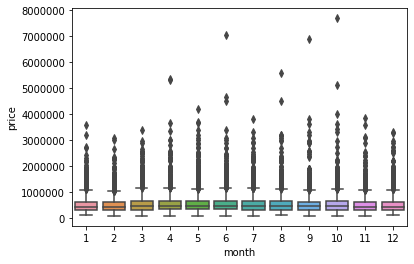

In [31]:
# check whether month has any effect on price
sns.boxplot(x="month",y="price",data=df)

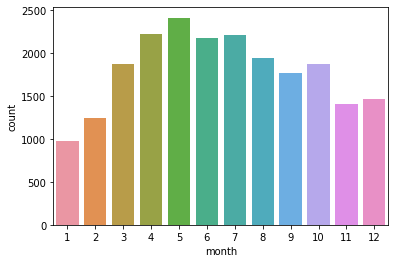

In [33]:
sns.countplot(x="month",data=df)

In [34]:
#date column is of no use now
df = df.drop('date',axis=1)

In [35]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [36]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [37]:
df = df.drop('zipcode',axis=1)

In [40]:

df["yr_renovated"].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [41]:
# since the large number of datapoints are 0, it means that the house was never renovated we can convert this
# into  boolean column giving us the information whether the house was renovated or not

In [42]:
df["renovated"] = df["yr_renovated"].apply(lambda year:False if year == 0 else True)

In [44]:
df = df.drop("renovated",axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [49]:
# If the house is not renovated then the renovation year will be the year when the house was built 
# def renovation_year(renovated):
#     print(renovated)
#     if renovated.yr_renovated == 0:
#         return renovated.yr_built
#     else:
#         return renovated.yr_renovated
# df["renovated"] = df[["yr_renovated","yr_built"]].apply(renovation_year)

# Splitting the data and training the Model

In [50]:
X = df.drop('price',axis=1).values
y = df["price"].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling the data 

In [54]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [55]:
# normalizing the data so that the model performs better on the data
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
model = Sequential()

The best approach to build a model is to base the number of neurons to match the input shape

In [58]:
xtrain.shape

(15117, 19)

In [64]:
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))

model.add(Dense(1))

model.compile(optimizer='adam',loss="mse")

In [65]:
# training the data

# validation data is the test data and is used to analyze the model performance,
# The model will use validation data only to test th performance, and not train on it.

# Smaller the batch size longer the training will be, but less likely to overfit since we are not sending the 
# entire data at a time
model.fit(xtrain,ytrain,
          validation_data=(xtest,ytest),
         batch_size = 128,epochs = 400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 12s 793us/sample - loss: 372924712868.8243 - val_loss: 116790611856.7506
Epoch 2/400
15117/15117 [==============================] - 1s 91us/sample - loss: 94696987034.3587 - val_loss: 78410322273.9753
Epoch 3/400
15117/15117 [==============================] - 1s 62us/sample - loss: 66276983658.0951 - val_loss: 51513855671.3086
Epoch 4/400
15117/15117 [==============================] - 1s 55us/sample - loss: 48993220873.8051 - val_loss: 44673123755.2988
Epoch 5/400
15117/15117 [==============================] - 1s 56us/sample - loss: 43901861488.3440 - val_loss: 39449731527.1111
Epoch 6/400
15117/15117 [==============================] - 1s 50us/sample - loss: 39991831377.1674 - val_loss: 37134753422.8543
Epoch 7/400
15117/15117 [==============================] - 1s 50us/sample - loss: 38132554218.8318 - val_loss: 35301646917.5309
Epoch 8/400
15117/15117 [==========================

15117/15117 [==============================] - 1s 37us/sample - loss: 23973177189.2857 - val_loss: 22786377889.8173
Epoch 128/400
15117/15117 [==============================] - 1s 36us/sample - loss: 23992072067.4123 - val_loss: 24003625657.8370
Epoch 129/400
15117/15117 [==============================] - 1s 37us/sample - loss: 23610920839.5613 - val_loss: 22976230872.8099
Epoch 130/400
15117/15117 [==============================] - 1s 36us/sample - loss: 23422613665.0817 - val_loss: 23565881834.5086
Epoch 131/400
15117/15117 [==============================] - 1s 33us/sample - loss: 23771780916.4125 - val_loss: 23721330106.4691
Epoch 132/400
15117/15117 [==============================] - 1s 86us/sample - loss: 23634507972.1024 - val_loss: 22698468890.5481
Epoch 133/400
15117/15117 [==============================] - 1s 69us/sample - loss: 23433568871.7412 - val_loss: 23789796779.2988
Epoch 134/400
15117/15117 [==============================] - 2s 107us/sample - loss: 23447656297.0113 - 

15117/15117 [==============================] - 1s 38us/sample - loss: 22517765356.7454 - val_loss: 22518955111.6642
Epoch 191/400
15117/15117 [==============================] - 1s 36us/sample - loss: 21843405769.6061 - val_loss: 23411173406.3407
Epoch 192/400
15117/15117 [==============================] - 1s 37us/sample - loss: 22109171445.1111 - val_loss: 22710758842.4691
Epoch 193/400
15117/15117 [==============================] - 1s 36us/sample - loss: 21787234443.9135 - val_loss: 22052827166.3407
Epoch 194/400
15117/15117 [==============================] - 1s 36us/sample - loss: 21685674592.9674 - val_loss: 22490113122.6074
Epoch 195/400
15117/15117 [==============================] - 1s 38us/sample - loss: 21652051351.3782 - val_loss: 22540202267.1802
Epoch 196/400
15117/15117 [==============================] - 1s 36us/sample - loss: 21726317914.0750 - val_loss: 24014142223.8025
Epoch 197/400
15117/15117 [==============================] - 1s 37us/sample - loss: 21808058246.1388 - v

15117/15117 [==============================] - 1s 37us/sample - loss: 12906299898.0390 - val_loss: 16584109903.0123
Epoch 317/400
15117/15117 [==============================] - 1s 37us/sample - loss: 13633315437.9054 - val_loss: 15669719692.3259
Epoch 318/400
15117/15117 [==============================] - 1s 36us/sample - loss: 13650806929.4341 - val_loss: 15759326245.9259
Epoch 319/400
15117/15117 [==============================] - 1s 40us/sample - loss: 12751281852.8883 - val_loss: 15779293312.9481
Epoch 320/400
15117/15117 [==============================] - 1s 36us/sample - loss: 13120264500.7512 - val_loss: 15713366905.9951
Epoch 321/400
15117/15117 [==============================] - 1s 38us/sample - loss: 12880370772.7745 - val_loss: 16475505995.2198
Epoch 322/400
15117/15117 [==============================] - 1s 36us/sample - loss: 12899733965.9753 - val_loss: 17434154143.2889
Epoch 323/400
15117/15117 [==============================] - 1s 37us/sample - loss: 14381002664.6515 - v

In [68]:
losses = pd.DataFrame(model.history.history)

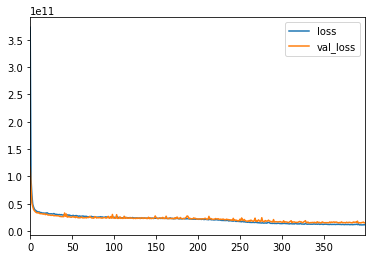

In [69]:
losses.plot()

In [77]:
# validating test data

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
predictions = model.predict(xtest)

In [73]:
predictions

array([[ 442079.66],
       [ 674555.9 ],
       [ 535400.  ],
       ...,
       [ 418515.56],
       [ 451746.34],
       [1097313.5 ]], dtype=float32)

In [74]:
mean_squared_error(ytest,predictions)

15326224524.880941

In [75]:
np.sqrt(mean_squared_error(ytest,predictions))

123799.12974201774

In [76]:
mean_absolute_error(ytest,predictions)

73282.54420572917

In [79]:
explained_variance_score(ytest,predictions)

0.8864020206368671

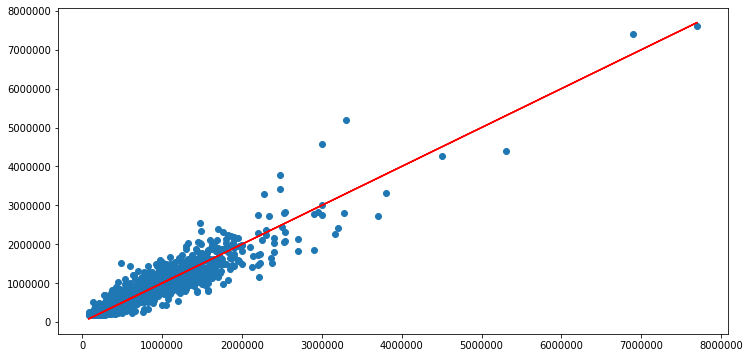

In [89]:
plt.figure(figsize=(12,6))
plt.scatter(ytest,predictions)
plt.plot(ytest,ytest,"r")
#plt.plot(ytest,predictions,"b")

In [102]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [106]:
new_house = df.drop('price',axis=1).iloc[0].values.reshape(-1,19)

In [109]:
new_house = scaler.transform(new_house)

In [110]:
model.predict(new_house)

array([[234097.02]], dtype=float32)